<a href="https://colab.research.google.com/github/sobieddch90/mcd_udg_tfm-egg_analysis/blob/main/Alzheimer_Open_Neuro_EEG_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Alzheimer EEG Analysis

- Author: Elmo Chavez
- Date:   05-Jun-2023

**Dataset Description**\
This dataset contains the EEG resting state-closed eyes recordings from 88 subjects in total.

Participants: 
- 36 of them were diagnosed with Alzheimer's disease (AD group)
- 23 were diagnosed with Frontotemporal Dementia (FTD group)
- 29 were healthy subjects (CN group).

Cognitive and neuropsychological state was evaluated by the international Mini-Mental State Examination (MMSE). MMSE score ranges from 0 to 30, with lower MMSE indicating more severe cognitive decline.

The duration of the disease was measured in months and the median value was 25 with IQR range (Q1-Q3) being 24 - 28.5 months. Concerning the AD groups, no dementia-related comorbidities have been reported. 

The average MMSE was:
- For the AD group was 17.75 (sd=4.5)
- For the FTD group was 22.17 (sd=8.22)
- For the CN group was 30.

The mean age:
- AD group was 66.4 (sd=7.9) 
- FTD group was 63.6 (sd=8.2)
- CN group was 67.9 (sd=5.4). 

Source Dataset:\
[Open Neuro: Alzheimer's disease, Frontotemporal dementia and Healthy subjects](https://openneuro.org/datasets/ds004504/versions/1.0.5)


**Workshop**\
description here



---

## Libraries

**OPEN NEURO**\
A Python client for accessing OpenNeuro datasets.\
https://pypi.org/project/openneuro-py/


Installing Open Neuro package:

Using a local environment with conda requires several packages before install Openneuro. Please make sure you already installed the following packages:

- ```conda install -c anaconda jupyter```
- ```conda update ipywidgets```
- ```conda install -c conda-forge tqdm```

Pip:
```
pip install openneuro-py
```
Conda:
```
conda install -c conda-forge openneuro-py
```

**MNE**\
Open-source Python package for exploring, visualizing, and analyzing human neurophysiological data: MEG, EEG, sEEG, ECoG, NIRS, and more.\
https://mne.tools/stable/index.html

Pip:
```
pip install mne
```
Conda:
```
conda create --strict-channel-priority --channel=conda-forge --name=mne mne-base
conda install -c conda-forge mne-base
```
*Suggestion*: Create a new conda environment to install MNE

In [8]:
%%capture
!pip install openneuro-py
!pip install mne

## Read and Explore the Data

Downloading the dataset directly from the website using openneuro package.

**PD**: *running the download command may take around 2 minutes or more.*

In [9]:
!mkdir /content/alzheimer_dataset

mkdir: cannot create directory ‘/content/alzheimer_dataset’: File exists


In [10]:
import openneuro as on

dataset_id = "ds004504"
output_dir = "/content/alzheimer_dataset"

on.download(dataset=dataset_id, target_dir=output_dir)


👋 Hello! This is openneuro-py 2022.4.0. Great to see you! 🤗

   👉 Please report problems 🤯 and bugs 🪲 at
      https://github.com/hoechenberger/openneuro-py/issues

🌍 Preparing to download ds004504 …


📁 Traversing directories for ds004504 : 0 entities [00:00, ? entities/s]

📥 Retrieving up to 357 files (5 concurrent downloads). 
✅ Finished downloading ds004504.
 
🧠 Please enjoy your brains.
 


In [41]:
import mne
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
path = os.getcwd()+'/alzheimer_dataset/sub-001/eeg/'
filename = 'sub-001_task-eyesclosed_eeg.set'

sub_001 = mne.io.read_raw_eeglab(path+filename, preload=True)
sub_001.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>

In [88]:
path = os.getcwd()+'/alzheimer_dataset/derivatives/sub-001/eeg/'
filename = 'sub-001_task-eyesclosed_eeg.set'

der_sub_001 = mne.io.read_raw_eeglab(path+filename, preload=True)
der_sub_001.info

<Info | 8 non-empty values
 bads: []
 ch_names: Fp1, Fp2, F3, F4, C3, C4, P3, P4, O1, O2, F7, F8, T3, T4, T5, ...
 chs: 19 EEG
 custom_ref_applied: False
 dig: 22 items (3 Cardinal, 19 EEG)
 highpass: 0.0 Hz
 lowpass: 250.0 Hz
 meas_date: unspecified
 nchan: 19
 projs: []
 sfreq: 500.0 Hz
>

### Comparison between Preprocessed and Unprocessed data

The unprocessed EEG recordings are included in folders named: sub-0XX. Folders named sub-0XX in the subfolder derivatives contain the preprocessed and denoised EEG recordings. The preprocessing pipeline of the EEG signals is as follows. First, a Butterworth band-pass filter 0.5-45 Hz was applied and the signals were re-referenced to A1-A2

In [14]:
sub_001.describe()

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV      -466.11     -78.71     -11.18      57.08    1192.97
 1  Fp2   EEG   µV      -423.54     -82.47     -16.85      43.12    2879.64
 2  F3    EEG   µV      -318.95     -71.69     -20.56      30.66     240.28
 3  F4    EEG   µV      -171.29      73.13     121.09     168.31     442.43
 4  C3    EEG   µV      -280.81     -66.50     -23.54      18.90     243.80
 5  C4    EEG   µV      -288.23     -23.93      21.68      66.02     347.22
 6  P3    EEG   µV      -242.87     -18.02      27.59      72.36     278.76
 7  P4    EEG   µV      -203.27      35.69      92.97     150.34     452.98
 8  O1    EEG   µV      -249.02      70.02     155.42     268.55     710.30
 9  O2    EEG   µV      -292.38     -38.82      19.48      88.33     439.11
10  F7    EEG   µV      -350.68     -64.79     -13.04      38.53     302

In [89]:
der_sub_001.describe()

<RawEEGLAB | sub-001_task-eyesclosed_eeg.set, 19 x 299900 (599.8 s), ~43.5 MB, data loaded>
ch  name  type  unit        min         Q1     median         Q3        max
 0  Fp1   EEG   µV      -161.52     -21.98       0.20      22.28     143.65
 1  Fp2   EEG   µV      -137.61     -21.79       0.29      22.22     148.81
 2  F3    EEG   µV      -126.39     -21.31       0.34      21.33     140.30
 3  F4    EEG   µV      -126.99     -21.21       0.38      21.46     149.70
 4  C3    EEG   µV      -126.59     -21.16       0.51      21.34     139.82
 5  C4    EEG   µV      -128.02     -21.16       0.47      21.42     145.65
 6  P3    EEG   µV      -124.71     -21.44       0.43      21.53     143.70
 7  P4    EEG   µV      -126.30     -21.42       0.45      21.61     137.40
 8  O1    EEG   µV      -127.03     -21.79       0.57      21.54     146.38
 9  O2    EEG   µV      -128.01     -21.88       0.35      21.90     152.92
10  F7    EEG   µV      -125.56     -21.20       0.27      21.63     139

Using matplotlib as 2D backend.


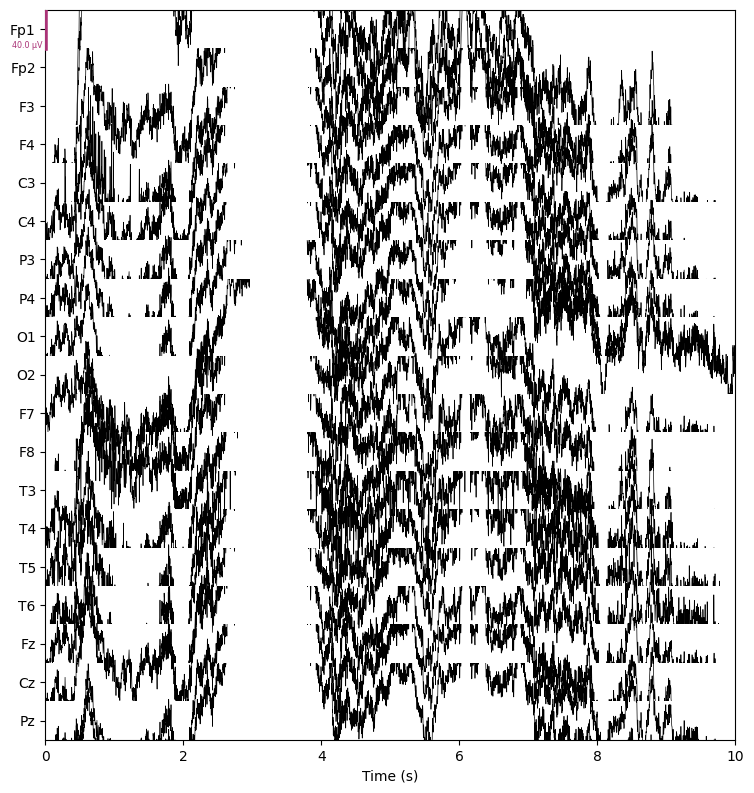

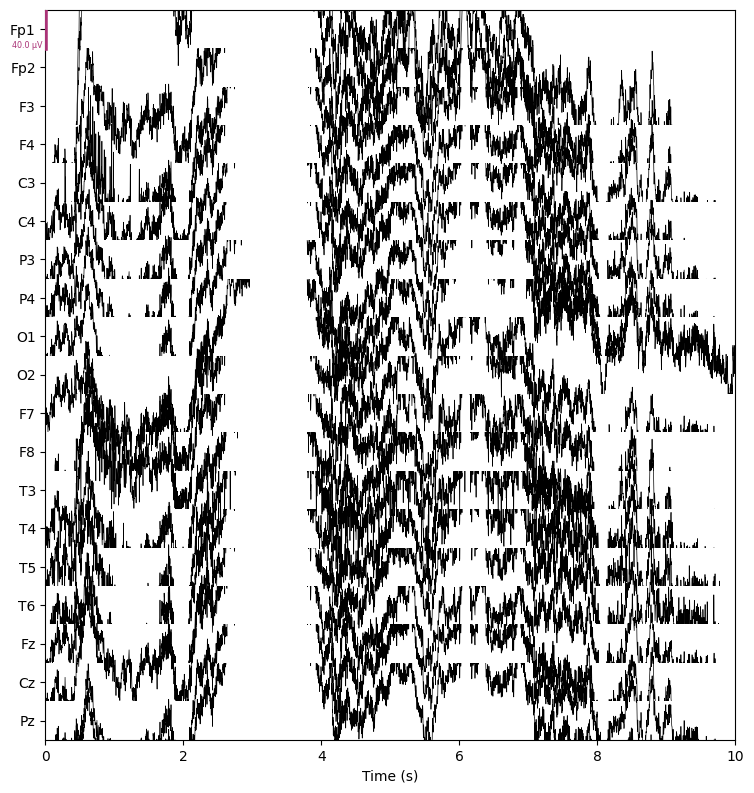

In [16]:
sub_001.plot(show_scrollbars=False, show_scalebars=True)

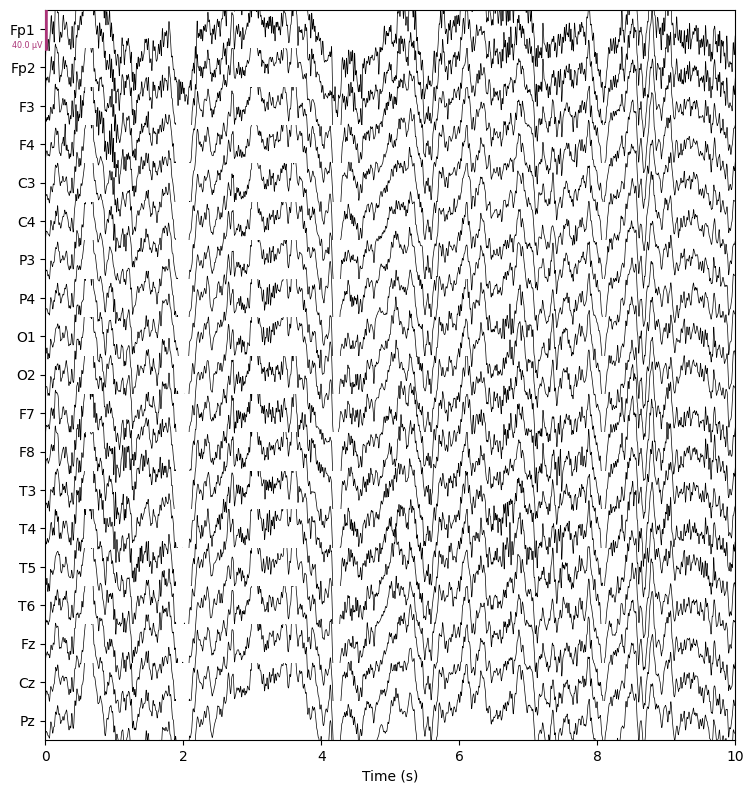

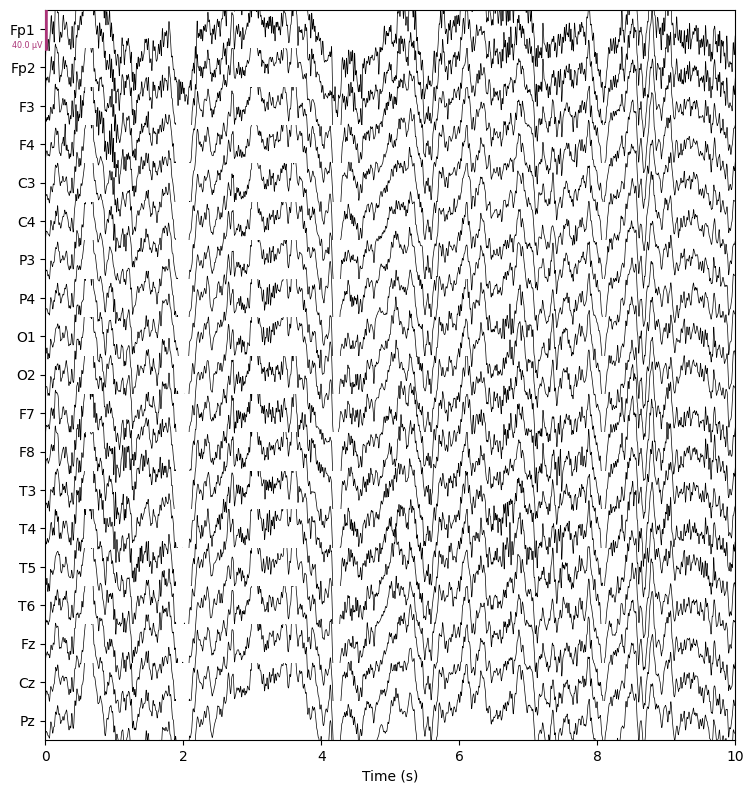

In [17]:
der_sub_001.plot(show_scrollbars=False, show_scalebars=True)

In [18]:
channels = der_sub_001.ch_names
print(channels)

['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']


NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


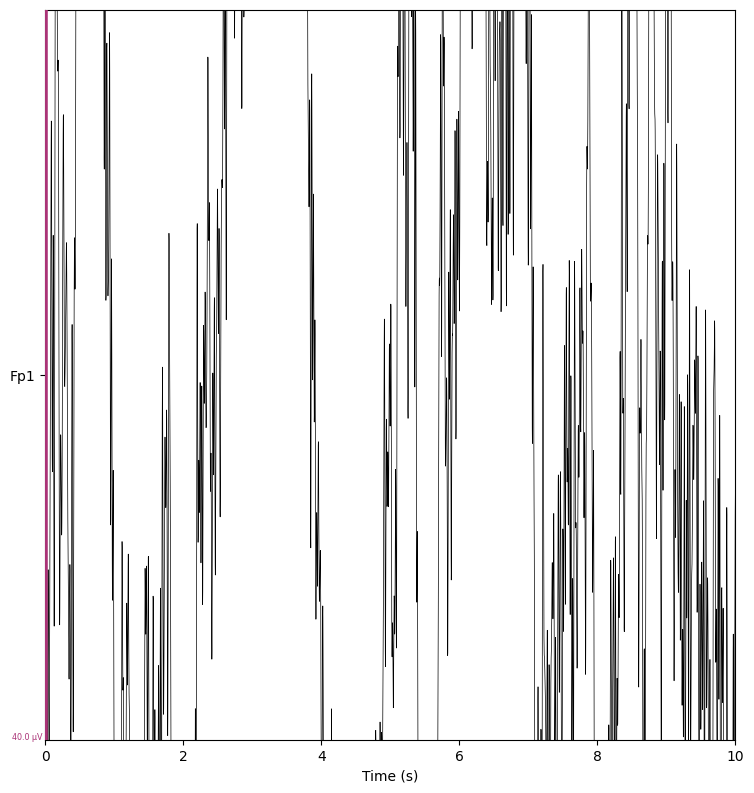

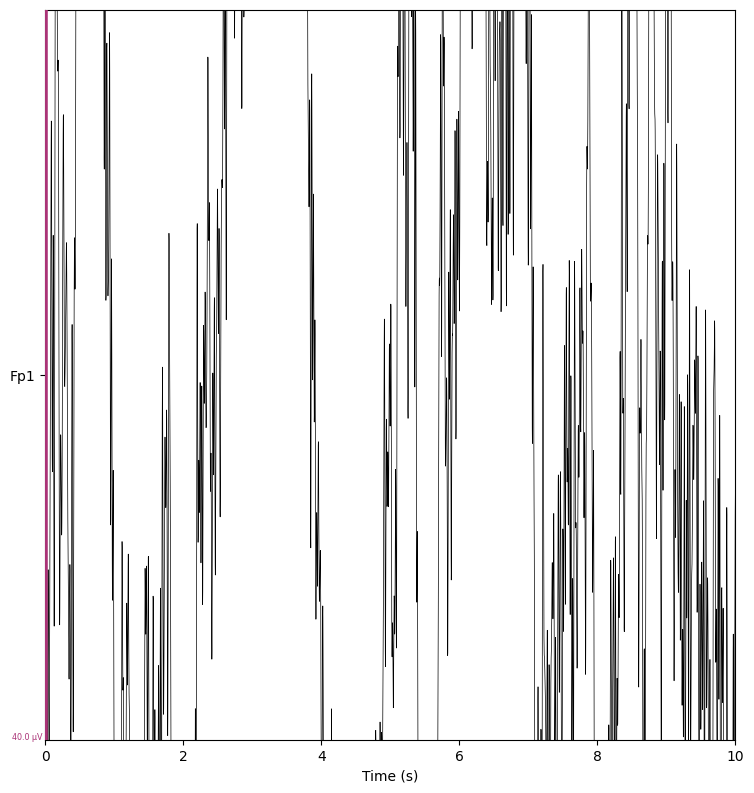

In [69]:
list_channels = ['Fp1']

# Running the following code will plot the channels previously pre-selected in the list_channels variable, 
# in addition to this, will filter these channels in the EEG object.
der_sub_001.pick_channels(list_channels).plot(show_scrollbars=False, show_scalebars=True)

In [90]:
freq = der_sub_001.info["sfreq"]
freq

500.0

Effective window size : 4.096 (s)


<ipython-input-93-909683d0f19a>:1: RuntimeWarning: in version 1.5, the default behavior of Spectrum.plot() will change so that bad channels will be shown by default. To keep the old default behavior (and silence this warning), explicitly pass `picks='data', exclude='bads'`.
  der_sub_001.compute_psd().plot()


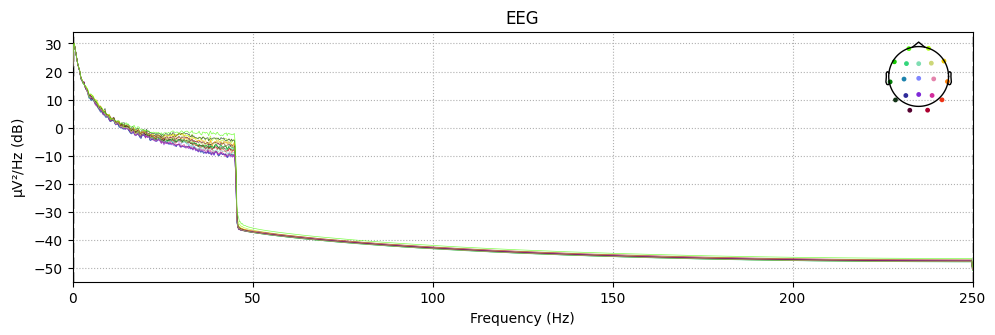

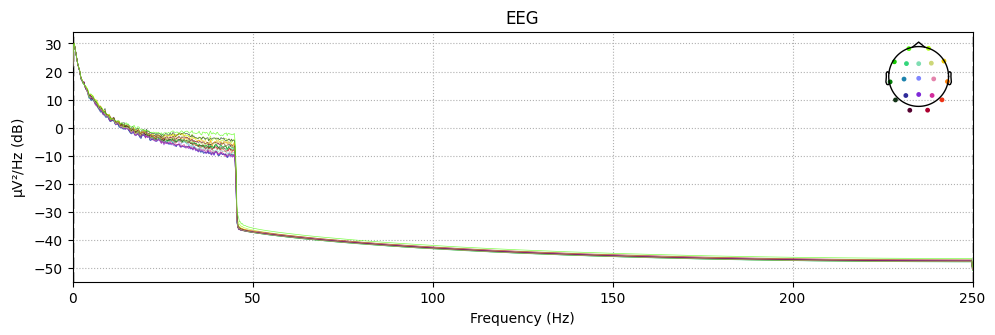

In [93]:
der_sub_001.compute_psd().plot()

Effective window size : 4.096 (s)


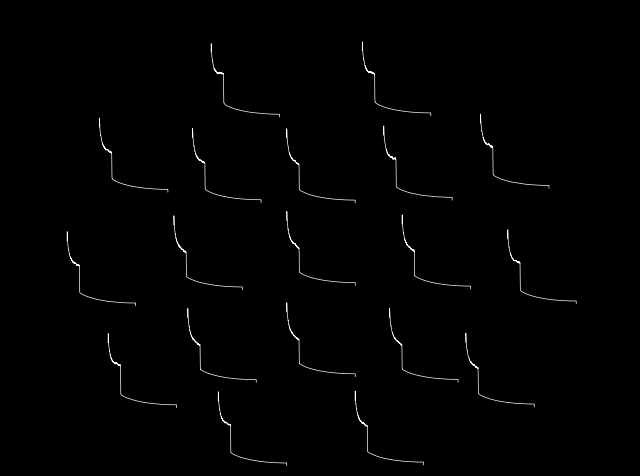

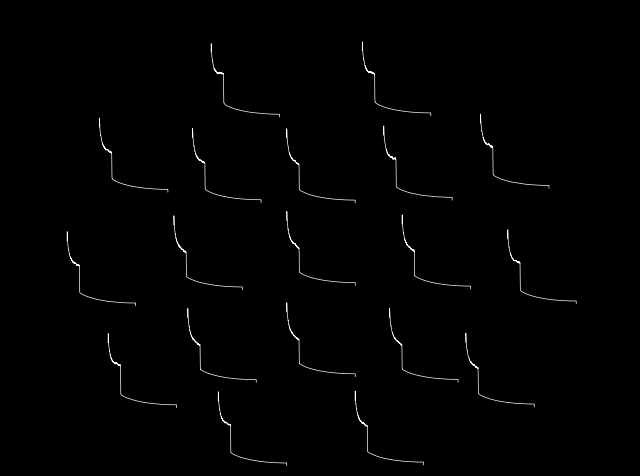

In [94]:
der_sub_001.compute_psd().plot_topo()

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)
NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 4.096 (s)


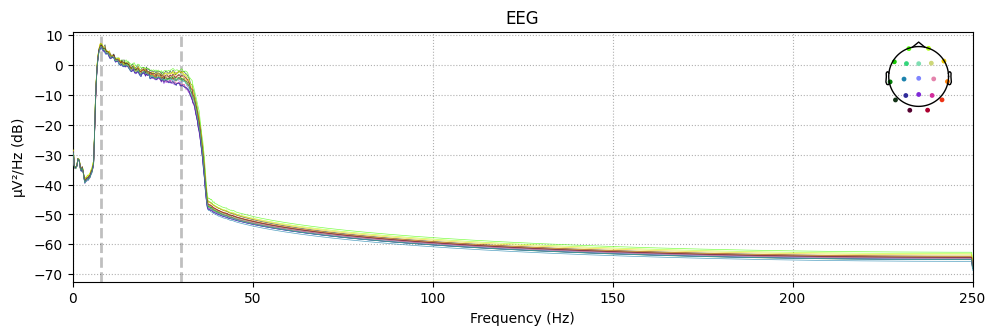

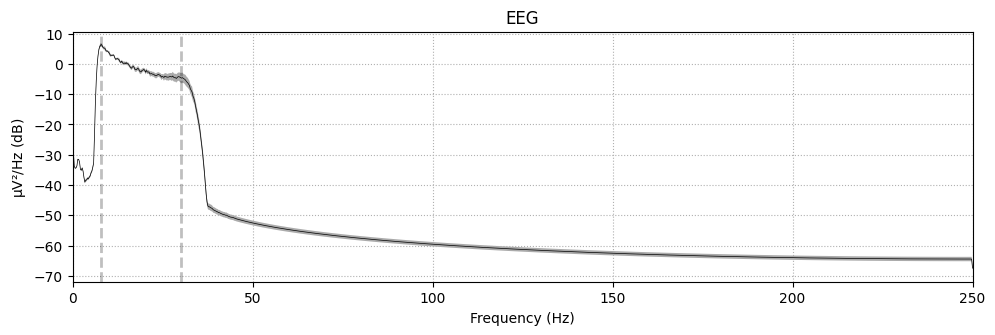

In [97]:
raw_filtered = der_sub_001.copy().filter(8,30, verbose=False);
raw_filtered.plot_psd();
raw_filtered.plot_psd(average=True);

Fitting ICA to data using 19 channels (please be patient, this may take a while)


<ipython-input-96-ccb013408e78>:2: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(der_sub_001.copy())


Selecting by number: 19 components
Fitting ICA took 8.0s.


<ipython-input-96-ccb013408e78>:2: RuntimeWarning: Using n_components=19 (resulting in n_components_=19) may lead to an unstable mixing matrix estimation because the ratio between the largest (18) and smallest (9.4e-15) variances is too large (> 1e6); consider setting n_components=0.999999 or an integer <= 16
  ica.fit(der_sub_001.copy())


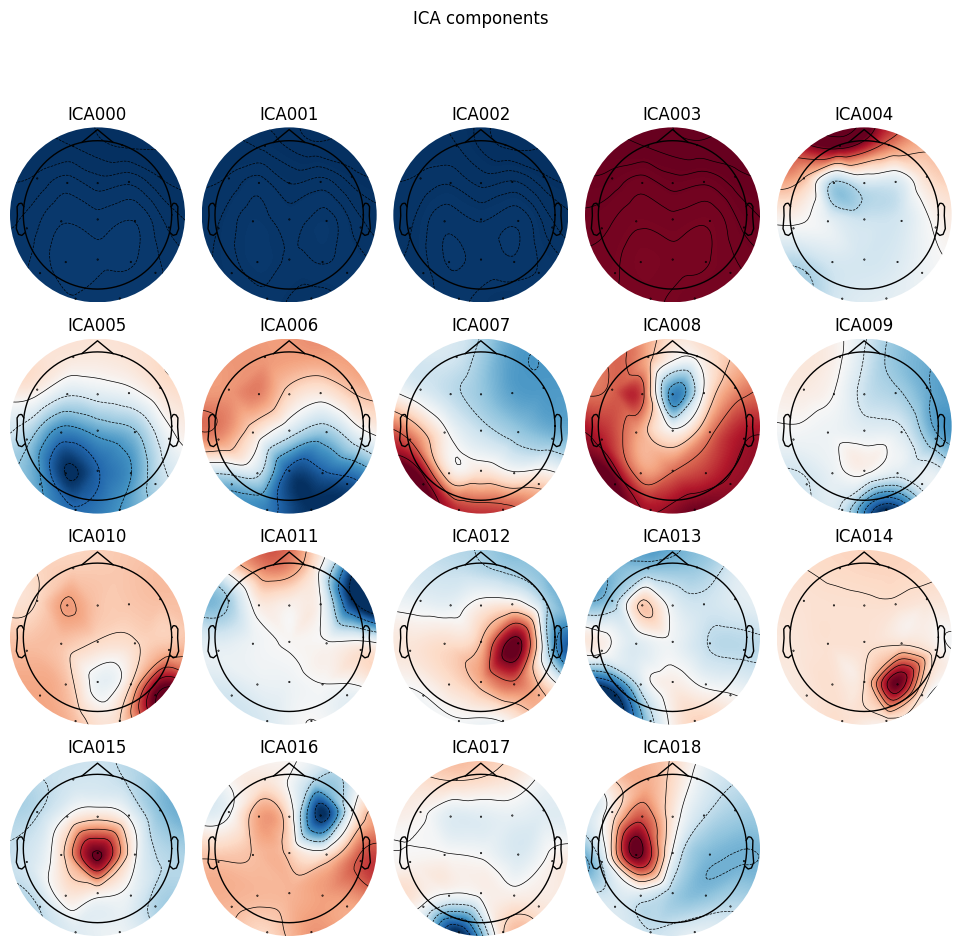

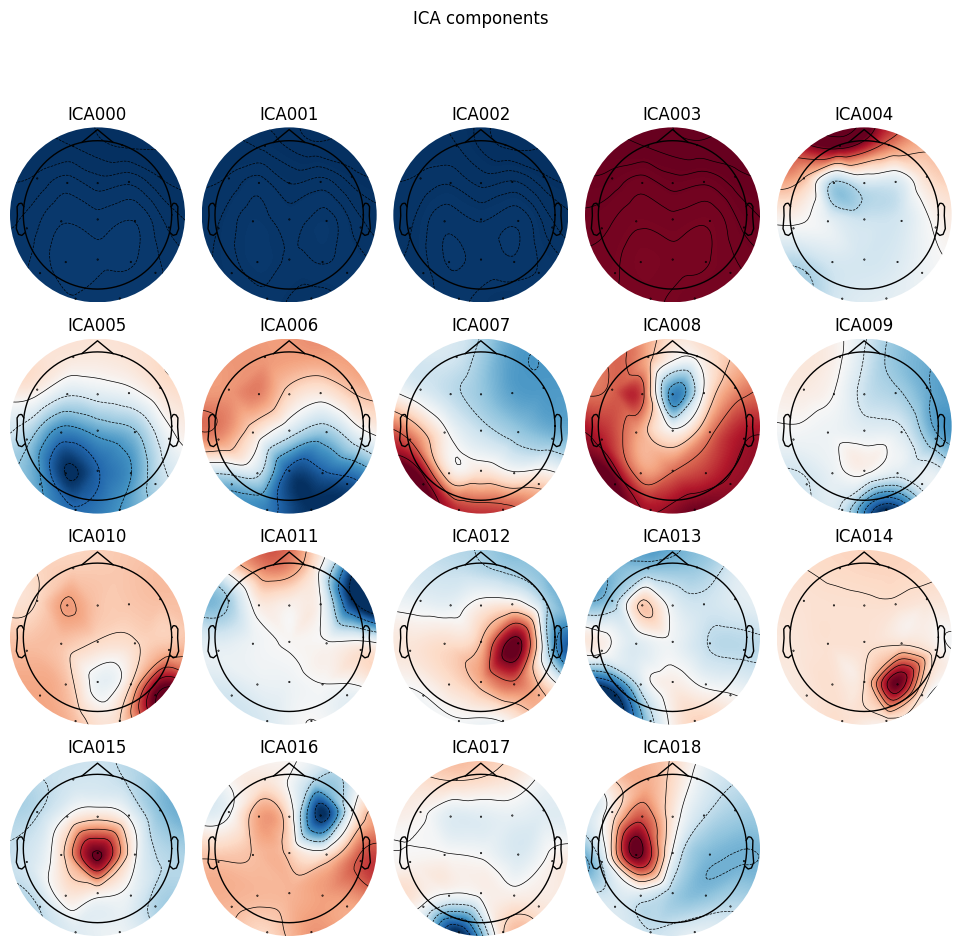

In [96]:
ica = mne.preprocessing.ICA(n_components=19, random_state=42)
ica.fit(der_sub_001.copy())
ica.plot_components()

In [98]:
der_sub_001.info.keys()

dict_keys(['acq_pars', 'acq_stim', 'ctf_head_t', 'description', 'dev_ctf_t', 'dig', 'experimenter', 'utc_offset', 'device_info', 'file_id', 'highpass', 'hpi_subsystem', 'kit_system_id', 'helium_info', 'line_freq', 'lowpass', 'meas_date', 'meas_id', 'proj_id', 'proj_name', 'subject_info', 'xplotter_layout', 'gantry_angle', 'bads', 'chs', 'comps', 'events', 'hpi_meas', 'hpi_results', 'projs', 'proc_history', 'custom_ref_applied', 'sfreq', 'dev_head_t', 'ch_names', 'nchan'])

In [99]:
der_sub_001.info['events']

[]

In [107]:
eeg_data = der_sub_001.get_data()
mean = eeg_data.mean()
std = eeg_data.std()
print("Mean:",mean)
print("Std:", std)

Mean: 2.2768474228882475e-08
Std: 3.183018333342961e-05


In [108]:
mean+(2*std)

6.36831351410881e-05

In [109]:
threshold = mean+(4*std)

crossings = (der_sub_001.get_data()[0]> threshold).astype(int)
diff = np.diff(crossings)
event_onsets = np.where(diff == 1)[0]+1

event_durations = np.ones_like(event_onsets)*200

event_descriptions = ['Event']*len(event_onsets)

annotations = mne.Annotations(onset=event_onsets, duration=event_durations, description=event_descriptions)

der_sub_001.set_annotations(annotations)

events, event_id = mne.events_from_annotations(der_sub_001)

print(events)

[]


<ipython-input-109-d763cfd4c09b>:13: RuntimeWarning: Omitted 9 annotation(s) that were outside data range.
  der_sub_001.set_annotations(annotations)


In [118]:
der_sub_001.get_data()

array([[-3.37166862e-05, -2.81891003e-05, -2.27961388e-05, ...,
         7.80744267e-06,  3.91629434e-06, -3.46407562e-07],
       [-2.51423264e-05, -2.07306213e-05, -1.66931953e-05, ...,
         1.12633924e-05,  7.11532831e-06,  2.75438499e-06],
       [-1.05016260e-05, -1.08054390e-05, -1.16539640e-05, ...,
         1.12534761e-05,  8.16010380e-06,  4.52085495e-06],
       ...,
       [-1.66402187e-05, -1.48037262e-05, -1.32992859e-05, ...,
         1.01925945e-05,  7.10190392e-06,  3.56178188e-06],
       [-1.59896297e-05, -1.44822769e-05, -1.31124592e-05, ...,
         7.03979826e-06,  5.04175997e-06,  2.26020527e-06],
       [-1.58982449e-05, -1.41470451e-05, -1.26495771e-05, ...,
         5.74603224e-06,  4.06592989e-06,  1.59326601e-06]])

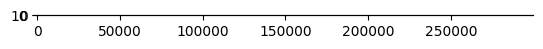

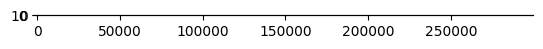

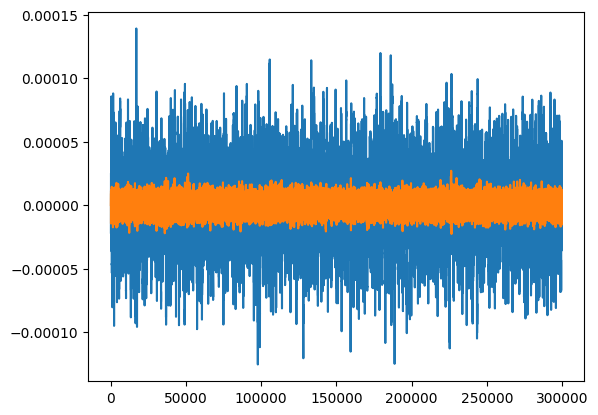

In [119]:
plt.imshow(der_sub_001.get_data())
plt.show()
plt.imshow(der_sub_001.copy().filter(1,10, verbose=False).get_data());
plt.show()
plt.plot(der_sub_001.copy().get_data()[10])
plt.plot(der_sub_001.copy().filter(8,30, verbose=False).get_data()[10])